# Other Graph Types

## bar charts

## histograms

## pie charts

<hr>

## Contour plots (advanced)

- What is a contour plot?
- How are they useful?
- How to build one in Jupyter

### Example - Contour Plot of Gridded Data

In this example we will make a contour plot using data in a file at [http://54.243.252.9/engr-1330-webroot/8-Labs/Lab07/gridded_data.txt](http://54.243.252.9/engr-1330-webroot/8-Labs/Lab07/gridded_data.txt)

The data in the file are organized as follows:

    160 240
    -3.0,-2.0,4.5206310380743785e-06
    -2.975,-2.0,5.248940670890073e-06
    -2.95,-2.0,6.086973208643232e-06
    -2.9250000000000003,-2.0,7.049985780998036e-06
    -2.9000000000000004,-2.0,8.155154929062083e-06
    ... many more rows
    
The first two entries are the row and column count of a rectangular region that we wish to plot the contours.  The remaining rows contain the x-,y-, and z-values.  The x and y values are the spatial locations where the z values are known.  There are a total of 38,400 records in the file - too big to manually enter.

The plotting package needs all the entries on a grid (hence gridding a process related to building contour plots is already done in this example) so we need to read in the xyz data then manipulte it so that there are three 2D structures `X[160][240]`, `Y[160][240]`, and `Z[160][240]` these structures get sent to the contour plotting function.

**Step 0: <font color='red'>Download the data file to your machine!</font>**
- Right-click the link
- Save (target, link, file ...) as ... (This action will differ by machine, OS, and browser!) but goal is to get a copy of the file to your machine.  <!--[I can't make it work](https://www.depts.ttu.edu/rawlsbusiness/).-->
- Verify you have the file and it is readable (its supposed to be ASCII, so open in an editor and see if it kind of looks like the fragment above, possibly without line feeds

**Step 1:** Create space to hold the data, then open the file

In [1]:
#%reset -f # only if necessaryimport requests # Module to process http/https requests
import requests # Module to process http/https requests
remote_url="http://54.243.252.9/engr-1330-webroot/8-Labs/Lab07/gridded_data.txt"  # set the url
rget = requests.get(remote_url, allow_redirects=True)  # get the remote resource, follow imbedded links
localfile = open('gridded_data.txt','wb') # open connection to a local file same name as remote
localfile.write(rget.content) # extract from the remote the contents,insert into the local file same name
localfile.close() # close connection to the local file

In [2]:
#### Reading a Data File ####
xyzmatrix = [] # null list to hold contents
xyzfile = open("gridded_data.txt","r") # open a read connection

**Step 2:** Read the first line, and extract the row and column counts

In [3]:
line1 = (xyzfile.readline().split()) # read just the first line
rowNum = int(line1[0]) # extract row count
colNum = int(line1[1]) # extract column count

**Step 3:** Read the remaining 38,000 lines

In [4]:
for line in xyzfile: # now read rest of the file, line by line
    xyzmatrix.append([float(n) for n in line.strip().split(",")])

So the read is complete, lets close the connection

In [5]:
xyzfile.close()

**Step 4:** Now build the structures for plotting, as before we need to allocate space for the data, here we are using a constructor syntax to build matrices of zeros using implied loops.

In [6]:
#### Build 2D Structure for Contour Plot Example ####
xlist = [[0 for j in range(colNum)] for i in range(rowNum)]     # null list to hold contents
ylist = [[0 for j in range(colNum)] for i in range(rowNum)]     # null list to hold contents
zlist = [[0 for j in range(colNum)] for i in range(rowNum)]     # null list to hold contents

**Step 5:** Next we will populate the matrices (grids) from the xyzmatrix we just read into the notebook.  Notice how we create a counter to keep track of each row of the xyzmatrix and increment the counter as we build the grids.

In [7]:
pointer=0
for irow in range(0,rowNum): 
    for jcol in range(0,colNum):
        xlist[irow][jcol]=(xyzmatrix[pointer][0])
        ylist[irow][jcol]=(xyzmatrix[pointer][1])
        zlist[irow][jcol]=(xyzmatrix[pointer][2])
        pointer += 1

**Step 6:** Now finally the plot - using a package called matplotlib which we will study later in the course.  For now use it as shown.

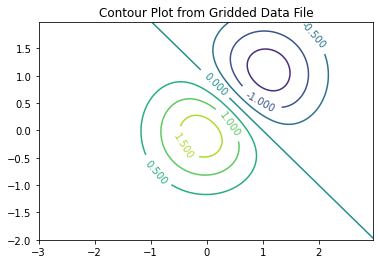

In [13]:
#### Build the Plot #####
import matplotlib # might need to activate this line on your computer
from matplotlib import pyplot
fig, ax = matplotlib.pyplot.subplots()
CS = ax.contour(xlist, ylist, zlist, levels = 7)
ax.clabel(CS, inline=2, fontsize=10)
ax.set_title('Contour Plot from Gridded Data File');
################################

<hr>

1. Contour Plots [https://clouds.eos.ubc.ca/~phil/docs/problem_solving/06-Plotting-with-Matplotlib/06.14-Contour-Plots.html](https://clouds.eos.ubc.ca/~phil/docs/problem_solving/06-Plotting-with-Matplotlib/06.14-Contour-Plots.html)

- How are irregular x,y,z data gridded

### Gridding Data



## surface plots (advanced)

## probability plots (advanced)

# Exercises

**Download** (right-click, save target as ...) this page as a jupyterlab notebook [ES-28](http://54.243.252.9/engr-1330-webroot/8-Labs/Lab28/Lab28-TH.ipynb)

___

# <font color=darkred>Exercise Set 28: Assessing Fitness; Prediction Intervals </font>

LAST NAME, FIRST NAME

R00000000

ENGR 1330 ES-28 - Homework

___


## Exercise 1

[Consumer Reports](https://web.consumerreports.org/test/SEM/version12.htm?EXTKEY=SG72CR0&ds_rl=1265560&ds_rl=1247084&ds_rl=1247078&gclid=EAIaIQobChMI_r_ljY2D9wIV3nxvBB2H4A5UEAAYASAAEgLqPvD_BwE&gclsrc=aw.ds) once tabulated the list of vehicle weights versus overall gasoline mileage for several different sizes and types of cars:

|Weight (lbs)|Mileage (mpg)|
|---:|---:|
|2775|33|
|2495|27|
|2405|29|
|2545|28|
|2270|34|
|2560|24|
|3050|23| 
|3710|24|
|3085|23|
|2940|21|
|2395|26|
|3325|20|
|3200|21|
|3450|19|
|3515|21|
|3495|19|
|4010|19|
|4205|17| 
|2900|24|
|2555|28|
|2790|21|
|2190|34|

Fit a linear data model to the data, plot the data and model.  Determine the equation of the data model and the corresponding RMSE and R$^2$ value.

Based on your results, how well are the data modeled by a linear data model?  How might a better data model be obtained?